# Grid Generation and Plotting with `PyVista`

In [8]:
import numpy as np
from polymesh import PolyData, CartesianFrame
from polymesh.grid import grid
from polymesh.cells import H8, H27, Q9, Q4
size = Lx, Ly, Lz = 800, 600, 100
shape = nx, ny, nz = 8, 6, 2
xbins = np.linspace(0, Lx, nx+1)
ybins = np.linspace(0, Ly, ny+1)
zbins = np.linspace(0, Lz, nz+1)
bins = xbins, ybins, zbins
coords, topo = grid(bins=bins, eshape='H8')
frame = CartesianFrame(dim=3)
pd = PolyData(coords=coords, topo=topo, celltype=H8, frame=frame)


In [9]:
pd.to_pv().extract_surface()

PolyData (0x217ea8fd040)
  N Cells:	152
  N Points:	154
  X Bounds:	0.000e+00, 8.000e+02
  Y Bounds:	0.000e+00, 6.000e+02
  Z Bounds:	0.000e+00, 1.000e+02
  N Arrays:	2

In [10]:
from polymesh.topo.tr import Q4_to_T3
from polymesh.topo import extract_tet_surface, detach
import k3d
from k3d.colormaps import matplotlib_color_maps

surface = pd.to_pv().extract_surface().triangulate().cast_to_unstructured_grid()
vertices = surface.points
indices = np.array(surface.cells_dict[5], dtype=int)

#vertices, indices = detach(coords, extract_surface(topo))

plot = k3d.plot(menu_visibility=False)

plot += k3d.mesh(vertices.astype(np.float32), indices.astype(np.uint32),
                 color_map=matplotlib_color_maps.Rainbow,
                 wireframe=False)

plot += k3d.mesh(vertices.astype(np.float32), indices.astype(np.uint32),
                 wireframe=True, color=0)

plot.display()

Output()

The `PolyData` class delegates plotting-related jobs to `pyVista`. Call your objects `plot` method the same way you'd call a `pyVista` object:

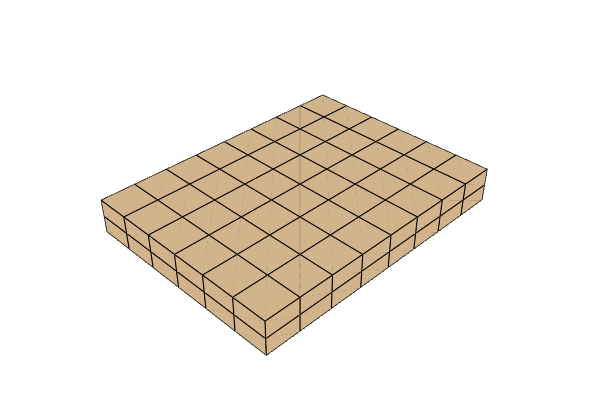

In [11]:
pd.plot(notebook=True, jupyter_backend='static', window_size = (600, 400))


In [12]:
coords, topo = grid(bins=bins, eshape='H27')
pd = PolyData(coords=coords, topo=topo, celltype=H27)
pd.plot(notebook=True, window_size = (600, 400))

In [13]:
coords, topo = grid(bins=(xbins, ybins), eshape='Q4')
frame = CartesianFrame(dim=3)
pd = PolyData(coords=coords, topo=topo, celltype=Q4, frame=frame)
pd.plot(notebook=True, window_size = (600, 400))

In [14]:
coords, topo = grid(bins=(xbins, ybins), eshape='Q9')
frame = CartesianFrame(dim=3)
pd = PolyData(coords=coords, topo=topo, celltype=Q9, frame=frame)
pd.plot(notebook=True, window_size = (600, 400))